In [1]:
import os

# 1. Print the current directory and switch to "Python/lesson_7"
print("Current directory:", os.getcwd())
os.chdir("Python/lesson_7")  # Move into the lesson_7 folder
print("New directory:", os.getcwd())

# 2. Build the path to the 'data' folder
path = os.path.join(os.getcwd(), 'data')  
print("Data folder path:", path)

# 3. (Optional) Check if the train file exists
file_train = os.path.join(path, 'train_catvnoncat.h5')
print("Checking if 'train_catvnoncat.h5' exists:", os.path.exists(file_train))

Current directory: /Users/stacey_xd
New directory: /Users/stacey_xd/Python/Lesson_7
Data folder path: /Users/stacey_xd/Python/Lesson_7/data
Checking if 'train_catvnoncat.h5' exists: True


In [2]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import h5py  # common package to interact with a dataset that is stored in an H5 file.
import scipy
from scipy import ndimage

In [3]:
#Load dataset

def load_dataset():
    file_train = os.path.join(path, 'train_catvnoncat.h5')
    file_test = os.path.join(path, 'test_catvnoncat.h5')
    
    train_dataset = h5py.File(file_train, "r")
    test_dataset = h5py.File(file_test, "r")
    
    X_train = np.array(train_dataset["train_set_x"][:])
    Y_train = np.array(train_dataset["train_set_y"][:])
    X_test = np.array(test_dataset["test_set_x"][:])
    Y_test = np.array(test_dataset["test_set_y"][:])
    
    classes = np.array(train_dataset["list_classes"][:]).astype(str)
    
    Y_train = Y_train.reshape(-1, 1)
    Y_test = Y_test.reshape(-1, 1)
    
    return X_train, Y_train, X_test, Y_test, classes

In [4]:
X_train, Y_train, X_test, Y_test, classes = load_dataset()

In [5]:
# Print the shapes of the training and test sets, as well as the label vectors
print("X_train.shape =", X_train.shape)
print("X_test.shape =", X_test.shape)
print("Y_train.shape =", Y_train.shape)
print("Y_test.shape =", Y_test.shape)

X_train.shape = (209, 64, 64, 3)
X_test.shape = (50, 64, 64, 3)
Y_train.shape = (209, 1)
Y_test.shape = (50, 1)


In [6]:
# Extract number of training examples, image size (height/width), and number of test examples
m_train = X_train.shape[0]
num_px = X_train.shape[1]
m_test = X_test.shape[0]

# Print out these important parameters
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


y = [1], it's a 'cat' picture.


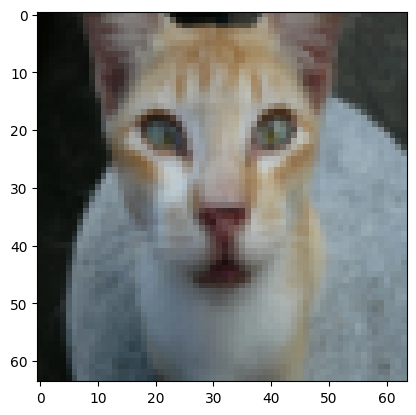

In [7]:
# Example of a picture
index = 11
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

y = [0], it's a 'non-cat' picture.


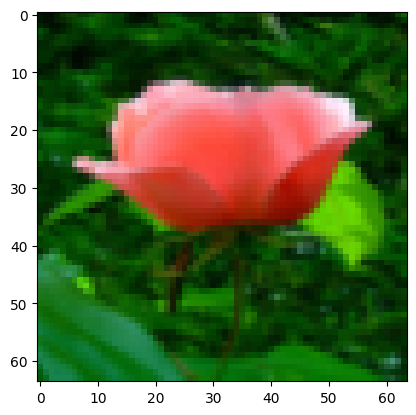

In [8]:
# Example of a picture
index = 3
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

In [9]:
# Count how many samples are labeled "1" (e.g., cat) and how many are labeled "0" (non-cat)
print ('Label 1 count:', np.sum(Y_train!=0))
print ('Label 0 count:', np.sum(Y_train==0))

Label 1 count: 72
Label 0 count: 137


In [10]:
# Flatten the training and test sets from 4D to 2D.
# Specifically, (m, height, width, 3) becomes (m, height*width*3).
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Print out the shapes to verify everything is correct.
print("train_set_x_flatten shape: {}".format(X_train_flatten.shape))
print("test_set_x_flatten shape: {}".format(X_test_flatten.shape))

# Print a small "sanity check" on the first few pixels of the very first training image.
print("sanity check after reshaping: {}".format(X_train_flatten[0, :5]))

train_set_x_flatten shape: (209, 12288)
test_set_x_flatten shape: (50, 12288)
sanity check after reshaping: [17 31 56 22 33]


In [11]:
# Normalize features

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.

print("X_train shape:", X_train.shape) 
print("Y_train shape:", Y_train.shape)


X_train shape: (209, 12288)
Y_train shape: (209, 1)


In [12]:
def sigmoid(z):
    """
    Computes the sigmoid of z.
    
    Arguments:
    z -- A scalar or numpy array of any size.
    
    Returns:
    g -- sigmoid(z), a value between 0 and 1 for each element of z.
    """
    g = 1 / (1 + np.exp(-z))
    return g

In [13]:
# Test the sigmoid function on [0, 2]
print("sigmoid([0, 2]) =", str(sigmoid(np.array([0, 2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [14]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (1, dim) for w and initializes b to 0.
    
    Note: For image inputs, "dim" should be set to num_px * num_px * 3.
    
    Arguments:
    dim -- size of the w vector we want (number of parameters, e.g., num_px*num_px*3 for images)
    
    Returns:
    w -- initialized vector of shape (1, dim)
    b -- initialized scalar (corresponds to the bias)
    """
    
    # Create a vector w of zeros, shape (1, dim)
    w = np.zeros((1, dim))
    
    # Initialize bias b as 0.0
    b = 0.0

    # Assertions to ensure the dimensions and types are correct
    assert w.shape == (1, dim)
    assert isinstance(b, float) or isinstance(b, int)
    
    # Return w and b
    return w, b

In [15]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    g -- sigmoid(z)
    """
    g = 1 / (1 + np.exp(-z))
    return g

# Demonstration of initialize_with_zeros using a small dimension (dim=2)
dim = 2
w, b = initialize_with_zeros(dim)
print("w =", str(w))
print("b =", str(b))

w = [[0. 0.]]
b = 0.0


In [16]:
def propagate(w, b, X, Y, C=1):
    """
    Implement the cost function and its gradient for the propagation explained above
    
    Arguments:
    w -- weights, a numpy array of size (1, num_px * num_px * 3)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (number of examples, 1)
    
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    m = X.shape[0]
    Z = b + np.dot(X, w.T)
    A = sigmoid(Z)
    
    # Compute cost with L2 regularization term
    cost = (-1.0 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) * C + (1/(2*m)) * np.sum(w**2)
    
    # Compute gradients with regularization term for dw
    dJ_dw = (1/m) * np.dot((A - Y).T, X) * C + (1/m) * w
    dJ_db = (1/m) * np.sum(A - Y)
    
    assert(dJ_dw.shape == w.shape)
    assert(isinstance(dJ_db, float) or isinstance(dJ_db, np.float64))
    assert(isinstance(cost, float) or isinstance(cost, np.float64))
    
    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}
    
    return grads, cost

In [17]:
# Testing
w, b = np.array([[1., 2.]]), 2.
X = np.array([[1., 2., -1.], [3., 4., -3.2]]).T  # shape (3, 2)
Y = np.array([[1, 0, 1]]).T                      # shape (3, 1)

grads, cost = propagate(w, b, X, Y, C=1)
print("dJ_dw =", str(grads["dJ_dw"]))
print("dJ_db =", str(grads["dJ_db"]))
print("cost =", str(cost))

dJ_dw = [[1.33178935 3.06173906]]
dJ_db = 0.001455578136784208
cost = 6.6348786527278865


In [18]:
def optimize(w, b, X, Y, num_iterations, learning_rate, C=1, verbose=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (1, num_px * num_px * 3)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (number of examples,1)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    verbose -- True to print the loss every 100 steps
    C -- regularization coefficient
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
   
    costs = []  # keep history for plotting if necessary 
    
    for i in range(num_iterations):        
    
        grads, cost = propagate(w, b, X, Y, C)
        
        # Retrieve derivatives from grads
        dJ_dw = grads["dJ_dw"]
        dJ_db = grads["dJ_db"]
        
        w = w - learning_rate * dJ_dw
        b = b - learning_rate * dJ_db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations if verbose is True
        if verbose and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}
    
    return params, grads, costs

In [19]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, verbose = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dJ_dw"]))
print ("db = " + str(grads["dJ_db"]))

w = [[ 0.08006006 -0.02399336]]
b = 1.9060971483059892
dw = [[0.62090316 1.19256883]]
db = 0.2084129285706479


In [20]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w - weights, a numpy array of size (1, num_px * num_px * 3)
    b - bias, a scalar
    X - data of size (number of examples, num_px * num_px * 3)
    
    Returns:
    Y_prediction - a numpy array of shape (number of examples, 1) containing all predictions (0/1) for the examples in X
    '''
    m, n = X.shape
    assert (w.shape == (1, n))
 
    # 1. Compute Z and then A = sigmoid(Z)
    Z = np.dot(X, w.T) + b     # shape (m, 1)
    A = sigmoid(Z)             # shape (m, 1)

    # 2. Convert probabilities A into actual predictions (0 or 1)
    Y_prediction = (A > 0.5).astype(int)  # also shape (m, 1)
    
    assert(Y_prediction.shape == (m, 1))
    
    return Y_prediction

In [21]:
w = np.array([[0.1124579],[0.23106775]]).T
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]]).T
print ("predictions = \n{}".format (predict(w, b, X)))

predictions = 
[[1]
 [1]
 [0]]


In [22]:
# Print the minimum and maximum pixel values in X_train, 
# as well as the shape of the X_train array.
print("min =", np.min(X_train))
print("max =", np.max(X_train))

min = 0.0
max = 1.0


In [23]:
print("X_train shape:", X_train.shape)

X_train shape: (209, 12288)


In [24]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, verbose = False, C= 1):
    """
    Builds the logistic regression model by calling the functions implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (number of examples, num_px * num_px * 3)
    Y_train -- training labels represented by a numpy array (vector) of shape (number of examples, 1)
    X_test -- test set represented by a numpy array of shape (number of examples, num_px * num_px * 3)
    Y_test -- test labels represented by a numpy array (vector) of shape (number of examples, 1)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    verbose -- Set to True to print the cost every 100 iterations
    C -- regularization parameter
    
    Returns:
    res -- dictionary containing information about the model:
        costs, Y_prediction_test, Y_prediction_train, w, b, learning_rate, num_iterations, C
    """
    
    # 1) Initialize parameters
    dim = X_train.shape[1]  # number of features
    w, b = initialize_with_zeros(dim)
    
    # 2) Run gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, 
                                        num_iterations=num_iterations, 
                                        learning_rate=learning_rate, 
                                        C=C, 
                                        verbose=verbose)
    
    # 3) Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # 4) Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy= {:.3%}".format(np.mean(Y_prediction_train == Y_train)))
    print("test accuracy= {:.3%}".format(np.mean(Y_prediction_test == Y_test)))
    
    # 5) Return dictionary with results
    res = {
        'costs': costs,
        'Y_prediction_test': Y_prediction_test, 
        'Y_prediction_train': Y_prediction_train, 
        'w': w, 
        'b': b,
        'learning_rate': learning_rate,
        'num_iterations': num_iterations,
        'C': C
    }
    
    return res

In [25]:
# Train the logistic regression model with the specified parameters
res = model(X_train=X_train,
            Y_train=Y_train,
            X_test=X_test,
            Y_test=Y_test,
            num_iterations=3000,
            learning_rate=0.005,
            verbose=True,
            C=0.3)

Cost after iteration 0: 0.207944
Cost after iteration 100: 0.171627
Cost after iteration 200: 0.158808
Cost after iteration 300: 0.149346
Cost after iteration 400: 0.141692
Cost after iteration 500: 0.135217
Cost after iteration 600: 0.129593
Cost after iteration 700: 0.124622
Cost after iteration 800: 0.120172
Cost after iteration 900: 0.116150
Cost after iteration 1000: 0.112486
Cost after iteration 1100: 0.109128
Cost after iteration 1200: 0.106034
Cost after iteration 1300: 0.103170
Cost after iteration 1400: 0.100508
Cost after iteration 1500: 0.098026
Cost after iteration 1600: 0.095704
Cost after iteration 1700: 0.093526
Cost after iteration 1800: 0.091479
Cost after iteration 1900: 0.089549
Cost after iteration 2000: 0.087728
Cost after iteration 2100: 0.086005
Cost after iteration 2200: 0.084372
Cost after iteration 2300: 0.082823
Cost after iteration 2400: 0.081351
Cost after iteration 2500: 0.079950
Cost after iteration 2600: 0.078615
Cost after iteration 2700: 0.077342
Cost

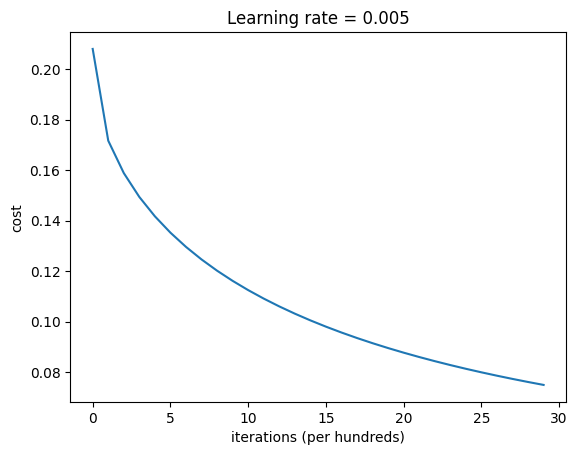

In [26]:
# Extract the list of costs from the 'res' dictionary and remove extra dimensions
costs = np.squeeze(res['costs'])

# Plot the cost values over the recorded iterations
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(res["learning_rate"]))
plt.show()

In [27]:
Y_test[index, 0], res["Y_prediction_test"][index, 0]

(np.int64(1), np.int64(1))

y_predicted = 1 (true label = 1) , you predicted that it is a cat picture.


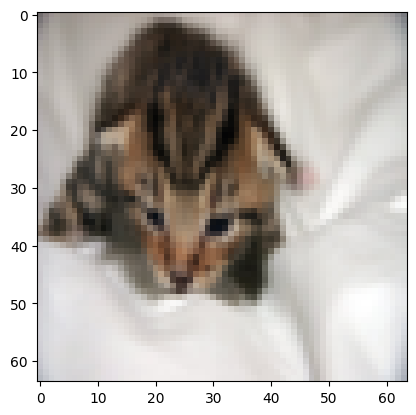

In [28]:
index = 1

plt.imshow(X_test[index, :].reshape(num_px, num_px, 3))
y_true = Y_test[index, 0]
y_predicted = res["Y_prediction_test"][index, 0]
print("y_predicted = {} (true label = {}) , you predicted that it is a {} picture.".
      format(y_predicted,
             y_true,
             classes[y_predicted]))

y_predicted = 0 (true label = 1) , you predicted that it is a non-cat picture.


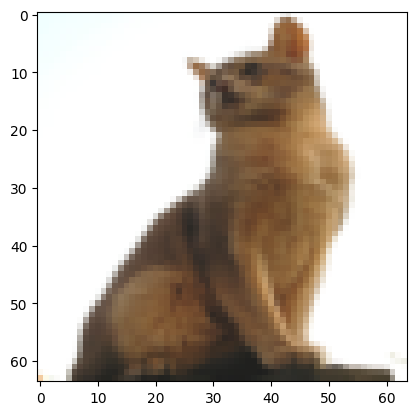

In [29]:
# index = 6 is an example of a picture that was wrongly classified.
index = 6

plt.imshow(X_test[index, :].reshape(num_px, num_px, 3))
y_true = Y_test[index, 0]
y_predicted = res["Y_prediction_test"][index, 0]
print("y_predicted = {} (true label = {}) , you predicted that it is a {} picture.".
      format(y_predicted,
             y_true,
             classes[y_predicted]))

In [30]:
Y_test[index, 0]

np.int64(1)

image.size=  (64, 64)


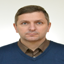

In [31]:
from PIL import Image
file_name=  os.path.join(path , 'Oleksiy.Tsebriy.jpg')
image = Image.open(file_name).resize((num_px,num_px))
print ('image.size= ', image.size)
image

In [32]:
my_image= np.array(image.getdata())
my_image.shape

(4096, 3)

In [33]:
my_image= my_image.reshape((1, num_px*num_px*3))
print ('my_image.shape=',my_image.shape)
my_image

my_image.shape= (1, 12288)


array([[227, 227, 217, ...,  43,  65,  96]], shape=(1, 12288))

In [34]:
my_predicted_image = predict(res["w"], res["b"], my_image)
my_predicted_image

print("y = {} , your algorithm predicts a {} picture.".
      format(np.squeeze(my_predicted_image), classes[np.squeeze(my_predicted_image)]))

y = 0 , your algorithm predicts a non-cat picture.


/var/folders/ch/1slnn2m1233c5pqwdcdftbcr0000gn/T/ipykernel_98315/556693935.py:11: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


image.size= (64, 64)


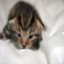

In [35]:
file_name = os.path.join(path, 'test_cat.jpg')
image = Image.open(file_name).resize((num_px, num_px))
print("image.size=", image.size)
image

In [36]:
my_image = np.array(image.getdata())[:, :3]  # sometimes screenshots have 4 channels
print("my_image.shape=", my_image.shape)
my_image = my_image.reshape((1, num_px*num_px*3))
print("after reshape: my_image.shape=", my_image.shape)

my_predicted_image = predict(res["w"], res["b"], my_image)
print("y = {} , your algorithm predicts a {} picture.".
      format(np.squeeze(my_predicted_image), classes[np.squeeze(my_predicted_image)]))

my_image.shape= (4096, 3)
after reshape: my_image.shape= (1, 12288)
y = 1 , your algorithm predicts a cat picture.


In [37]:
X_train_orig, Y_train, X_test_orig, Y_test, classes = load_dataset()
X_train_flat = X_train_orig.reshape(X_train_orig.shape[0], -1)  # shape (m, 12288)
X_train_scaled = X_train_flat / 255.0                           # normalization

X_test_flat = X_test_orig.reshape(X_test_orig.shape[0], -1)
X_test_scaled = X_test_flat / 255.0


In [38]:
from sklearn.linear_model import LogisticRegression

# Convert labels to 1D-vector, since LogisticRegression needs (m,) instead of (m,1)
y_train = np.squeeze(Y_train)
y_test = np.squeeze(Y_test)

# Create and train LogisticRegression with regularization C=0.01
clf = LogisticRegression(C=0.01).fit(X_train_scaled, y_train)

# Print accuracy on train and test sets
print("train accuracy= {:.3%}".format(clf.score(X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test_scaled, y_test)))

# Predict for one image (my_image). We assume my_image is already flattened/normalized (divide by 255)
prediction = np.squeeze(clf.predict(my_image))  # returns 0 or 1

print("y = {} , sklearn algorithm predicts a {} picture."
      .format(prediction, classes[prediction]))

train accuracy= 90.909%
test accuracy= 66.000%
y = 1 , sklearn algorithm predicts a cat picture.


In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load breast cancer dataset
data = load_breast_cancer()
X_cancer = data.data      # shape: (569, 30)
y_cancer = data.target    # shape: (569,)

# Split into train and test with random_state=0
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

# Train LogisticRegression with max_iter=10000
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Print results
print("\nBreast cancer dataset")
print("X_cancer.shape=", X_cancer.shape)
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Logistic regression classifier on test set: {:.2f}".format(clf.score(X_test, y_test)))


Breast cancer dataset
X_cancer.shape= (569, 30)
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.95
